In [1]:
##Import relevant libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
##load dataset
Artworks = pd.read_csv('Artworks.csv')
Artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [3]:
# Basically, we are to obtain these below:
##1. How modern are the artworks the museum?
##2. Which Artist are featured most?
##3. Are there any trends in the date of acquisition?
##4. What types of Artwork are most common?

In [4]:
##Now to obtain any of the above, we do not need some of the informations such as
## "on OnView", "Circumference", "Depth", etc. So we will have to drop them
Art_data = Artworks.iloc[:, 0:18]
Art_data.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3.0
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5.0
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6.0


In [5]:
##Thus, to how modern are the artworks the museum are, we must look at the dates in which the artworks are made
## and classify them: Contemporary(0 - 50years), Modern (51-100yrs), Modern classic(101-200yrs), and Classic(> 200yrs)

##Let's proceed to use def function to extract age from the dates
current_year = datetime.now().year

def extract_age(date_str):
    
    ##Handle missing date
    if not isinstance(date_str, str):
        return None
    
    ##Handle single-digits dates
    match = re.search(r"(\d{4})s?", date_str)
    if match:
        year = int(match.group(1).rstrip('s'))
        age = current_year - year
        return age
    
    ##Handle dates in ranges
    match = re.search(r"(\d{4})-(\d{4})", date_str)
    if match:
        start_year, end_year = int(map, date_str)
        age = (start_year + end_year) // 2
        return age
    
    ##Handle Circa dates
    match = re.search(r'(c\.|ca\\.|Circa\\.) (\d{4})', date_str, re.IGNORECASE)
    if match:
        year = int(match.group(2))
        age = current_year - year
        return age
    
    ##Handle "Late" and 'Early' Dates
    match = re.search(r"(Late|Early) (\d{4}s?)", date_str, re.IGNORECASE)
    if match:
        decade = int(match.group(2).rstrip('s'))
        year = decade + 5 if match.group(1) == 'Late' else decade
        age = current_year - year
        return age
    
    ##Handle 'Before' and 'After' Date
    match = re.search(r"(Before|After)(\d{4}s?)", date_str, re.IGNORECASE)
    if match:
        year = int(match.group(2).rstrip('s'))
        age = current_year - year - 1 if match.group(1) == 'Before' else current_year - year + 1
        return age
    
    ##Handle century dates
    match = re.search(r"(\d+)(st|nd|rd|th) century", date_str)
    if match:
        century = int(match.group(1))
        start_year = (century - 1) * 100 + 1
        end_year = century * 100
        age = current_year -  end_year
        return age
    
    ##Handle 'Unknown' and 'n.d' Dates
    match = re.search(r"('Unknown|n.d')", date_str)
    if match:
        return None
    
    ##Handle all other unknown dates
    else:
        return None
    

Art_data['Age']  = Art_data['Date'].apply(extract_age)
Art_data.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,Age
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0,129.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3.0,38.0
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4.0,122.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5.0,45.0
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6.0,122.0


In [6]:
##After Age extraction, we thus proceed to classification or grouping:
##Contemporary(0 - 50years), Modern (51-100yrs), Modern classic(101-200yrs), and Classic(> 200yrs)

def group(Age):
    if Age <= 30: #Artworks b/w 0-30 years old
        return 'Contemporary'
    elif 30 < Age <=70: #Artworks b/w 31-70 years old
        return 'Modern'
    elif 70 < Age <= 100: ##Artworks b/w 71-100 years old
        return 'Mid-20th century'
    elif 100 < Age <= 150: #Early 20th Century
        return 'Early 20th Century'
    elif Age is None:
        return None
    else:
        return '19th century/Earlier'
    
Art_data['Age Class'] = Art_data['Age'].apply(group)
Art_data.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,Age,Age Class
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0,129.0,Early 20th Century
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3.0,38.0,Modern
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4.0,122.0,Early 20th Century
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5.0,45.0,Modern
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6.0,122.0,Early 20th Century


In [7]:
##Plot a bar-chart and pie-chart showing the percentage of the Age classes
Age_class_count = Art_data['Age Class'].value_counts()

##calculate the percentage
Age_class_in_percentage = (Age_class_count/Age_class_count.sum()) * 100
Age_class_in_percentage = pd.DataFrame({'Age Class': ['Mid-20th century', 'Modern', 'Early 20th Century', '19th century/Earlier', 'Contemporary'],
                                       'Percentages': [35.063244, 34.214157,  25.049061, 4.873025, 0.800513]})
Age_class_in_percentage

,Age Class,Percentages
0,Mid-20th century,35.063244
1,Modern,34.214157
2,Early 20th Century,25.049061
3,19th century/Earlier,4.873025
4,Contemporary,0.800513


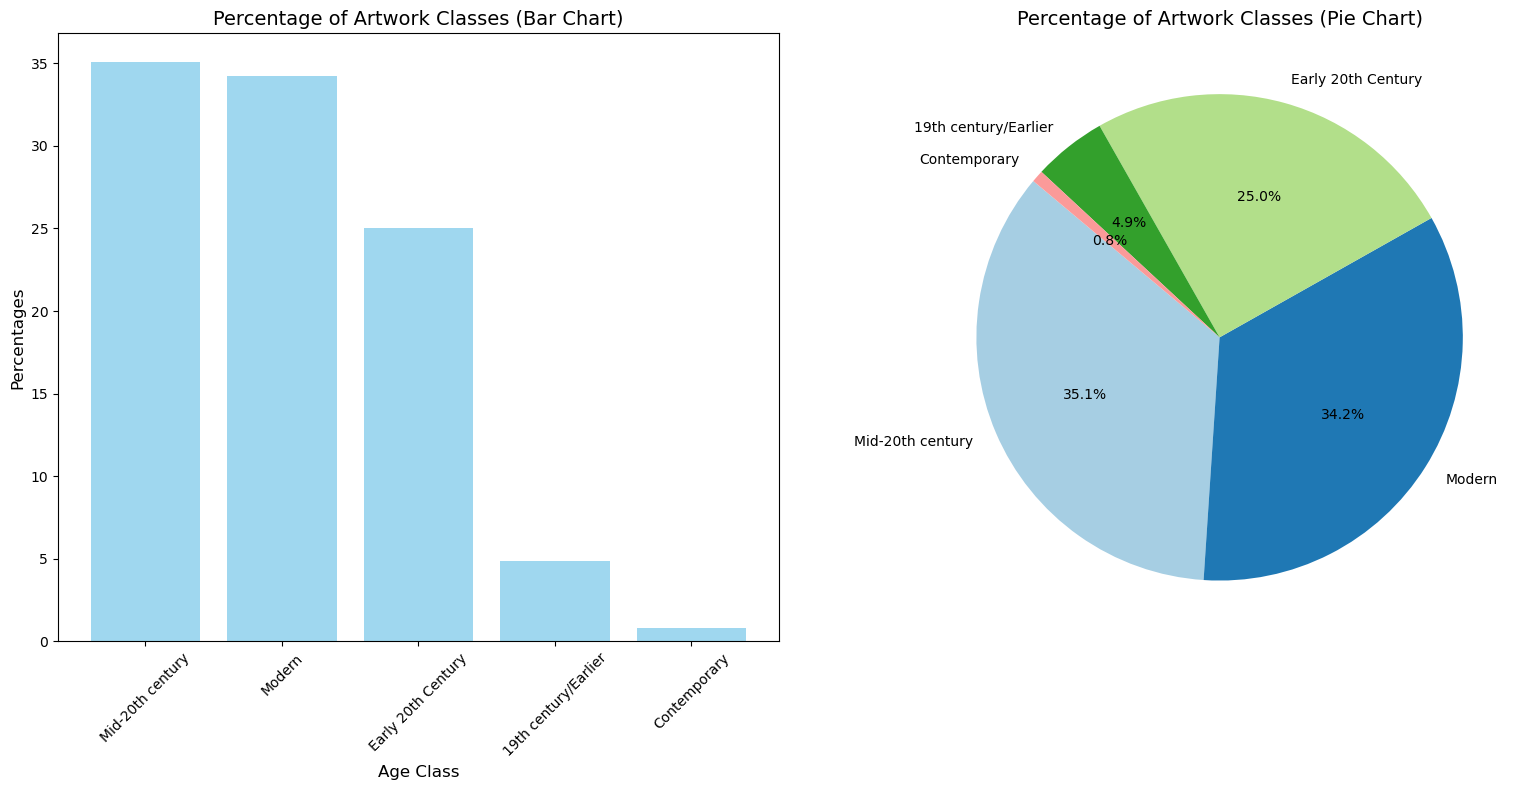

In [8]:
##Create a figure os subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar Chart
axes[0].bar(
    Age_class_in_percentage['Age Class'], 
    Age_class_in_percentage['Percentages'], 
    color='skyblue', 
    alpha=0.8
)
axes[0].set_title('Percentage of Artwork Classes (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Age Class', fontsize=12)
axes[0].set_ylabel('Percentages', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie Chart
axes[1].pie(
    Age_class_in_percentage['Percentages'], 
    labels=Age_class_in_percentage['Age Class'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
axes[1].set_title('Percentage of Artwork Classes (Pie Chart)', fontsize=14)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [9]:
##from the bar-chart and pie-chart, we found out that:
##1. Mid-Century Arts = 35.1%, 
##2. Modern Arts = 34.2%
##3. Early 20th Century Arts= 25%
##4. 19th Century/Earlier Arts= 4.9%
##5. Contemporary Arts = 0.8%

In [10]:
##In Resolving Which Artist are featured most, let's create a checkpoint and drop some more information from the data
Artist_data = Art_data.copy()
Artist_data = Artist_data.drop(['ConstituentID', 'ArtistBio', 'BeginDate', 'EndDate', 'Gender',
                               'Medium', 'Dimensions', 'CreditLine', 'Cataloged', 'ObjectID'], axis = 1)
Artist_data.head()

,Title,Artist,Nationality,Date,AccessionNumber,Classification,Department,DateAcquired,Age,Age Class
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,(Austrian),1896,885.1996,Architecture,Architecture & Design,1996-04-09,129.0,Early 20th Century
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,(French),1987,1.1995,Architecture,Architecture & Design,1995-01-17,38.0,Modern
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,(Austrian),1903,1.1997,Architecture,Architecture & Design,1997-01-15,122.0,Early 20th Century
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,(),1980,2.1995,Architecture,Architecture & Design,1995-01-17,45.0,Modern
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,(Austrian),1903,2.1997,Architecture,Architecture & Design,1997-01-15,122.0,Early 20th Century


In [11]:
##count the artists that were featured
Artist_count = Artist_data['Artist'].value_counts()

#Put the artists that were featured
Artist_count_df = pd.DataFrame(Artist_count)

##reset the index
Artist_count_df = Artist_count_df.reset_index()

##Rename the columns
Artist_count_df = Artist_count_df.rename(columns = {'Artist': 'Artist_count', 'index': 'Artists'})

##eye-ball the Artist count dataframe
Artist_count_df

,Artist_count,count
0,Eugène Atget,5018
1,Marc Chagall,1035
2,Henri Matisse,796
3,Pablo Picasso,772
4,Émile Bernard,624
...,...,...
5831,A. Paramonov,1
5832,Kuzma Petrov-Vodkin,1
5833,"Sergei Pozharskii, V. I. Pozharskii",1
5834,"Dieter Rams, Hochschule für Gestaltung, Ulm, G...",1


In [12]:
##To resolve if there are any trends in the date of acquisition, we'll have to create a new checkpoint,
##drop some informations and apply the time-series and visualization approach

trend_data = Artist_data.copy()
trend_data = trend_data.drop(['AccessionNumber', 'Department'], axis = 1)
trend_data.head()

,Title,Artist,Nationality,Date,Classification,DateAcquired,Age,Age Class
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,(Austrian),1896,Architecture,1996-04-09,129.0,Early 20th Century
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,(French),1987,Architecture,1995-01-17,38.0,Modern
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,(Austrian),1903,Architecture,1997-01-15,122.0,Early 20th Century
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,(),1980,Architecture,1995-01-17,45.0,Modern
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,(Austrian),1903,Architecture,1997-01-15,122.0,Early 20th Century


In [13]:
##We must also convert 'DateAcquired' to date-time format
def parsed_date(date_str):
    
    ##Handle non-strain numbers and missing values:
    if not isinstance (date_str, str) or date_str.strip==(''):
        return None
    
    ##Handle cases with a 4 digit year
    match = re.search(r"(\d{4})(?:[^\d]*-?\d*)?", date_str)
    if match:
        try:
            year = int(match.group(1))  # Extract the first valid year
            return str(year)
        except ValueError:
            return None  # In case year extraction fails
    
    else:
        return None
    
trend_data['Year'] = trend_data['DateAcquired'].apply(parsed_date)
trend_data.head()

,Title,Artist,Nationality,Date,Classification,DateAcquired,Age,Age Class,Year
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,(Austrian),1896,Architecture,1996-04-09,129.0,Early 20th Century,1996
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,(French),1987,Architecture,1995-01-17,38.0,Modern,1995
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,(Austrian),1903,Architecture,1997-01-15,122.0,Early 20th Century,1997
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,(),1980,Architecture,1995-01-17,45.0,Modern,1995
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,(Austrian),1903,Architecture,1997-01-15,122.0,Early 20th Century,1997


In [14]:
##Count the number of acquisition and groupby Year
trend_data_df = trend_data.groupby('Year')['Artist'].count()

##Reset the Index
trend_data_df = trend_data_df.reset_index()

##Rename the columnn
trend_data_df = trend_data_df.rename(columns = {'Artist': 'Acquisition'})
trend_data_df.head()

,Year,Acquisition
0,1929,1
1,1930,2
2,1932,8
3,1933,91
4,1934,131


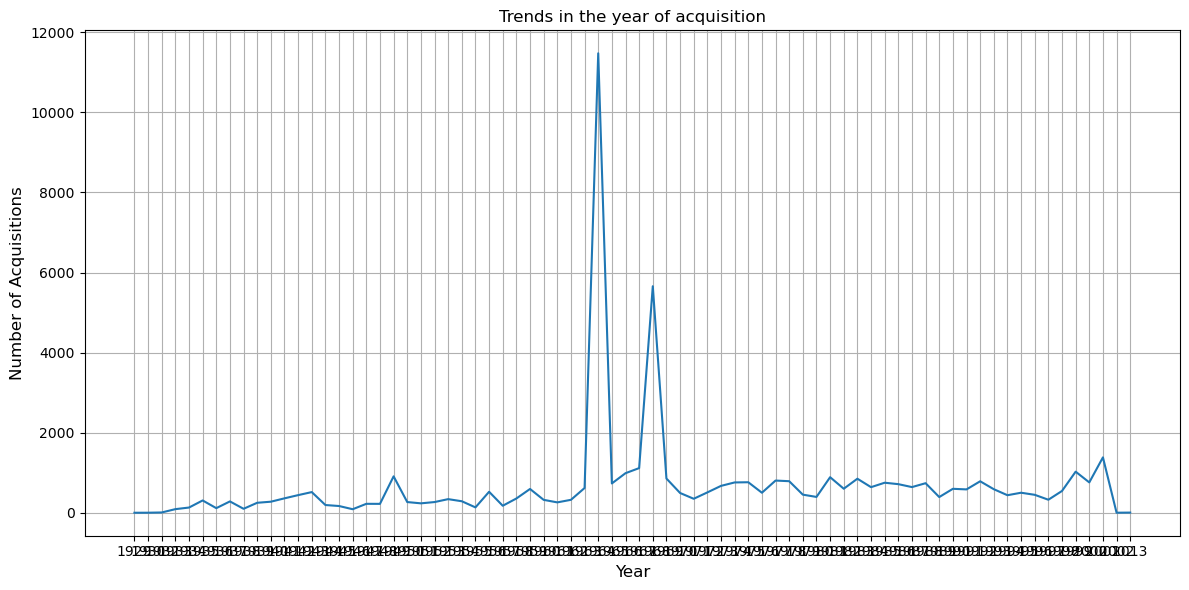

In [15]:
##Plot the Year against Acquisition to observe the trends

##import relevant libraries
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(trend_data_df['Year'], trend_data_df['Acquisition'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Acquisitions', fontsize = 12)
plt.title('Trends in the year of acquisition')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
##Year is hardly visible even though the trends is noticeable. Hence, we'll ensure all is numeric and convert the year to deacades
##and plot a barchart

trend_data_df['Year'] = pd.to_numeric(trend_data_df['Year'])

trend_data_df = trend_data_df.dropna(subset = ['Year'])

trend_data_df['Decades'] = trend_data_df['Year'] // 10 * 10

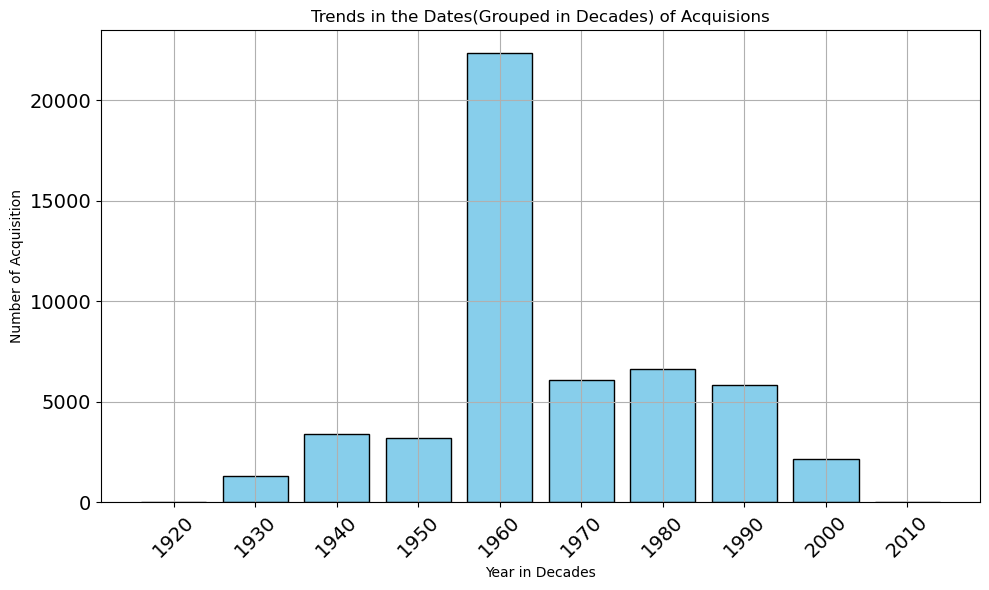

In [17]:
##Group the Year in Decades by the sum of Acquistions, then Plot a bar-chart
trend_by_decades = trend_data_df.groupby('Decades')['Acquisition'].sum().reset_index()

##Plot the bar-chart
plt.figure(figsize=(10,6))
plt.bar(trend_by_decades['Decades'], trend_by_decades['Acquisition'], width = 8, color='skyblue', edgecolor='black')
plt.xlabel('Year in Decades', fontsize = 10)
plt.ylabel('Number of Acquisition', fontsize = 10)
plt.title('Trends in the Dates(Grouped in Decades) of Acquisions')
plt.xticks(trend_by_decades['Decades'], fontsize = 14, rotation = 45) ##Rotate the x-axis for clarity
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.grid(True)
plt.show()

In [18]:
####From the trend displayed in the bar chart above, we can see that there is:

##1. a steady increase in acquisitions from the 1920s through the 1950s, 
##   showing a growing emphasis on collecting artworks over time.

##2. a significant spike in the number of acquisitions with the count exceeding 40,000 in the 1960s. 
##   This could be a period of increased activity in acquiring artworks, possibly due to cultural, economic,
##   an outlier, or other factors. 

##3. also a huge decline in the acquisition of arts after the peak in the 1960s, but soon stabilized afterwards
##   in the 1970s through 1990s.

##4. a surge in the acquisition in 2000-2010, and this could be as a result of renewed interest in arts or improved capacity
##   to do so by musuems. 

##5. a decline in 2020s, and this could be as a result of covid-19 pandemic, global recession, and massive decline
#    in economic activities

In [19]:
##4. What types of artwork are most common? ##This can be resolved by counting the classification
most_common_artworks = trend_data['Classification'].value_counts()
print(f'Types of artwork most common are: \n{most_common_artworks}')

Types of artwork most common are: 
Classification
Illustrated Book                  22765
Photograph                        15069
Design                             6978
Drawing                            4892
Architecture                        887
Print                               542
Periodical                          235
Mies van der Rohe Archive            81
Painting                              6
Multiple                              5
Installation                          2
Furniture and Interiors               2
Graphic Design                        1
Ephemera                              1
Photography Research/Reference        1
Name: count, dtype: int64


In [20]:
##calculate the percentage
common_artworks_in_percentage = (most_common_artworks/most_common_artworks.sum()) * 100

##Display the results in a dataframe
common_artworks_in_percentage = pd.DataFrame({'Classification': ['Illustrated Book', 'Photograph', 'Design', 'Drawing', 'Architecture', 'Print',
                                                                 'Periodical', 'Mies van der Rohe Archive', 'Painting', 'Multiple', 'Installation',
                                                                 'Furniture and Interiors', 'Graphic Design', 'Ephemera', 'Photography Research/Reference'],
                                              'Percentages(%)': [44.232226, 29.278955, 13.558202, 9.505120, 1.723434, 1.053102, 0.456603, 0.157382,
                                                                 0.011658, 0.009715, 0.003886, 0.003886, 0.001943,  0.001943, 0.001943]})                   
common_artworks_in_percentage

,Classification,Percentages(%)
0,Illustrated Book,44.232226
1,Photograph,29.278955
2,Design,13.558202
3,Drawing,9.505120
4,Architecture,1.723434
5,Print,1.053102
6,Periodical,0.456603
7,Mies van der Rohe Archive,0.157382
8,Painting,0.011658
9,Multiple,0.009715


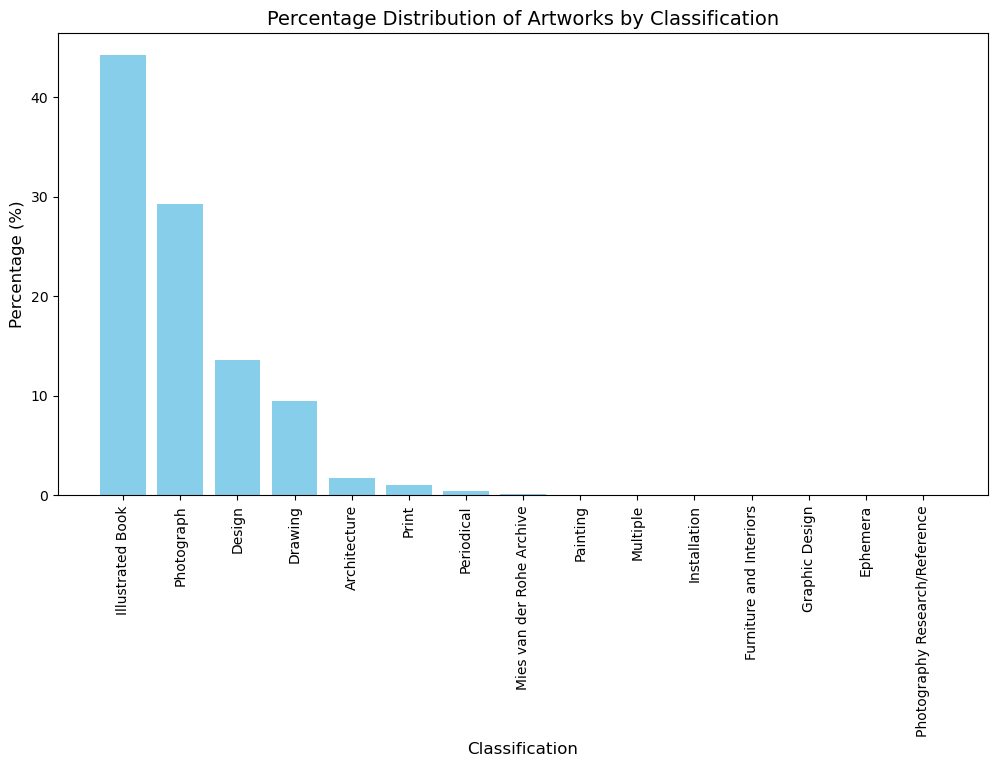

In [21]:
# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(common_artworks_in_percentage['Classification'], common_artworks_in_percentage['Percentages(%)'], color='skyblue')
plt.title('Percentage Distribution of Artworks by Classification', fontsize=14)
plt.xlabel('Classification', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.show()